В этой тетрадке тестируем пайплайн для обработки одного изображения

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
plt.rcParams['figure.figsize'] = 16, 5
import seaborn as sns
sns.set_style('white')

In [3]:
import stripes.analysis as analysis
import stripes.preprocessing as preproc
import stripes.palette as palette
from stripes.detection import StripeDetector

Часть 1 - определяем на изображении полоску и вырезаем ее:

In [4]:
detector = StripeDetector()

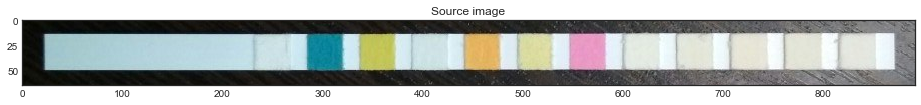

In [19]:
image = cv2.cvtColor(cv2.imread("../../images/crop.png"), cv2.COLOR_BGR2RGB)
plt.title("Source image")
plt.imshow(image)
plt.show()

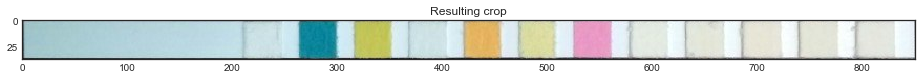

In [20]:
crop = detector.detect(image)
plt.title("Resulting crop")
plt.imshow(crop)
plt.show()

Посмотрим на отдельные шаги детектора:

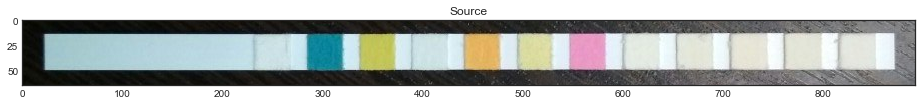

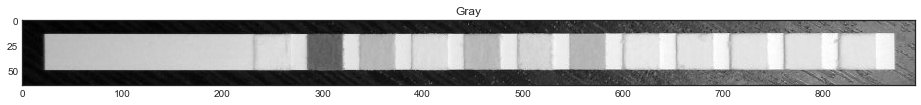

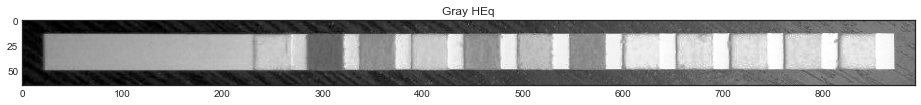

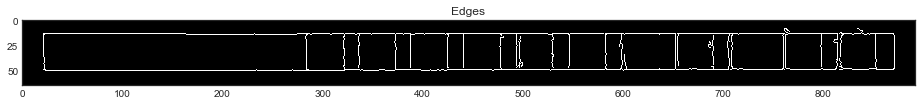

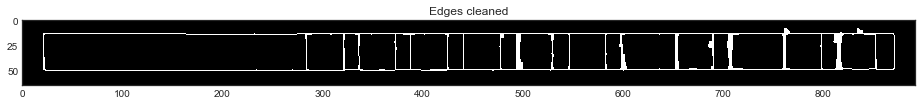

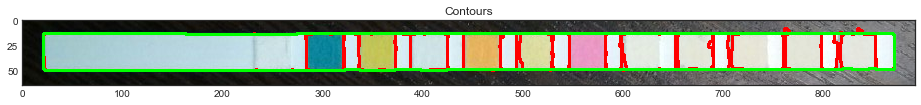

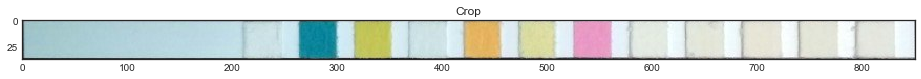

In [21]:
detector.show_steps()

Часть 2 - выравниваем баланс белого:

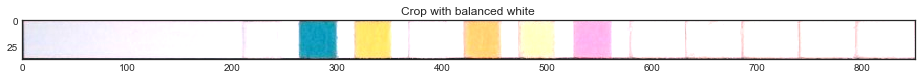

In [22]:
crop_wb = preproc.adjust_white_balance(crop)
plt.title("Crop with balanced white")
plt.imshow(crop_wb)
plt.show()

Часть 3 - Считываем информацию о цветах в ячейках:

In [24]:
crop_wb = cv2.resize(crop_wb, (25 * 24, 25))

In [25]:
pool_boxes = preproc.get_pool_boxes(crop_wb)
print pool_boxes

[[148   0 173  25]
 [185   0 210  25]
 [223   0 248  25]
 [260   0 285  25]
 [297   0 322  25]
 [334   0 359  25]
 [372   0 397  25]
 [409   0 434  25]
 [446   0 471  25]
 [483   0 508  25]
 [521   0 546  25]
 [558   0 583  25]]


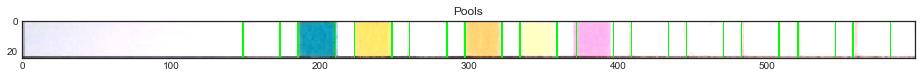

In [26]:
crop_pools = crop_wb.copy()
for pool_box in pool_boxes:
    cv2.rectangle(crop_pools, (pool_box[0], pool_box[1]), (pool_box[2], pool_box[3]), (0, 255, 0), 1)

plt.title("Pools")
plt.imshow(crop_pools)
plt.show()

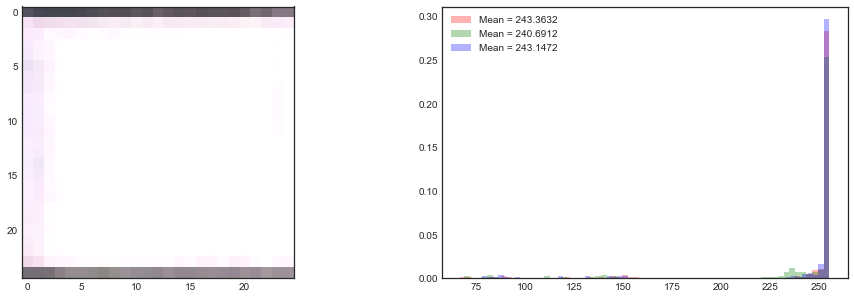

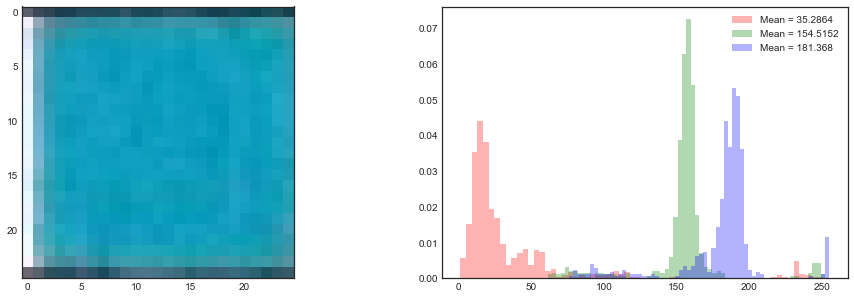

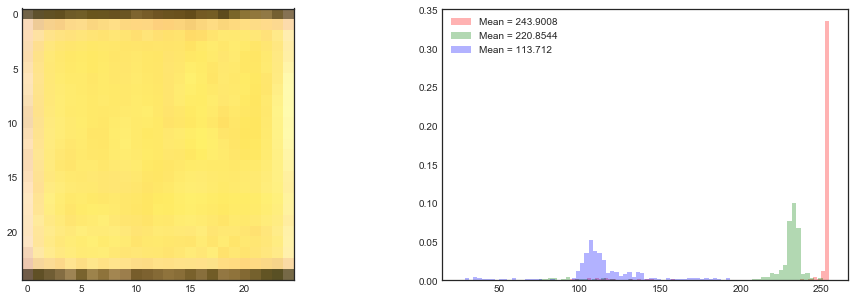

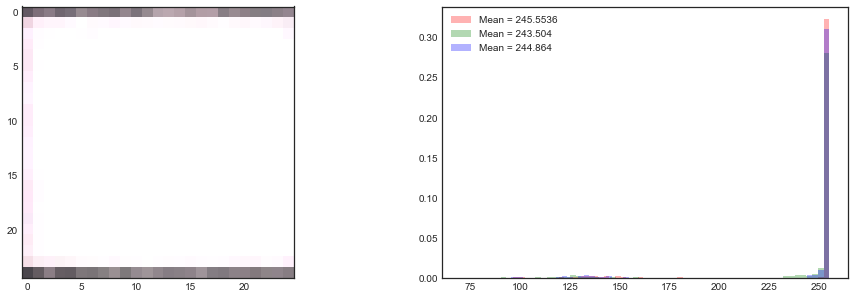

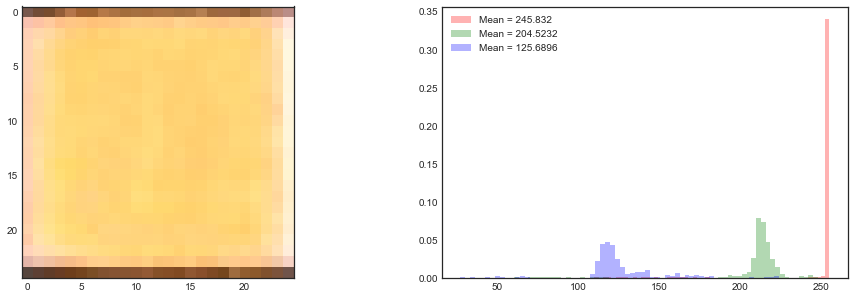

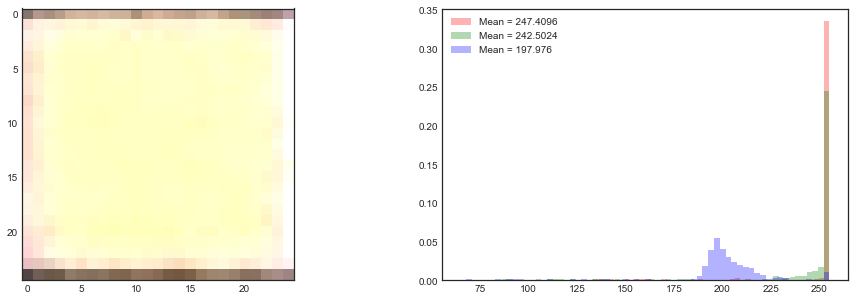

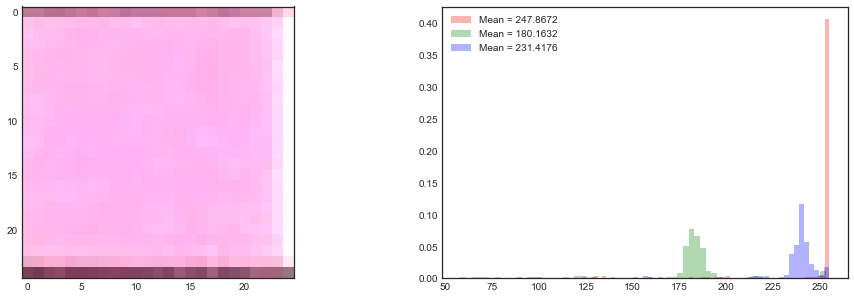

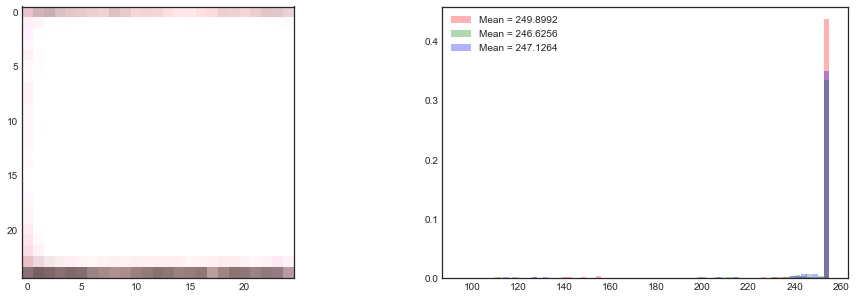

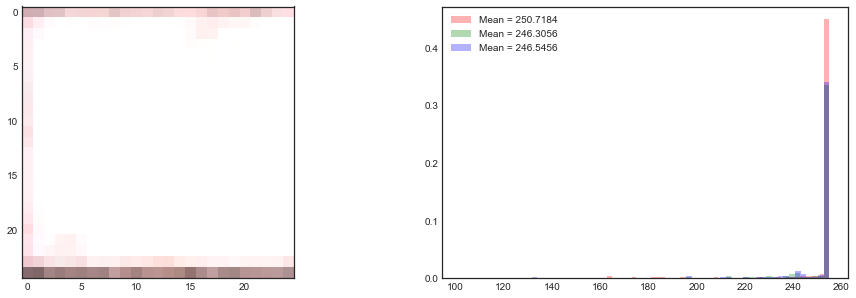

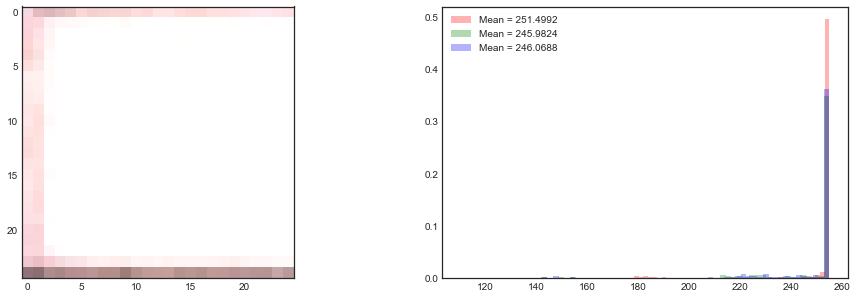

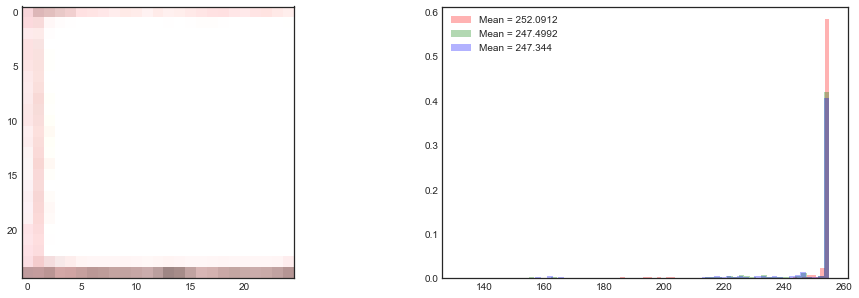

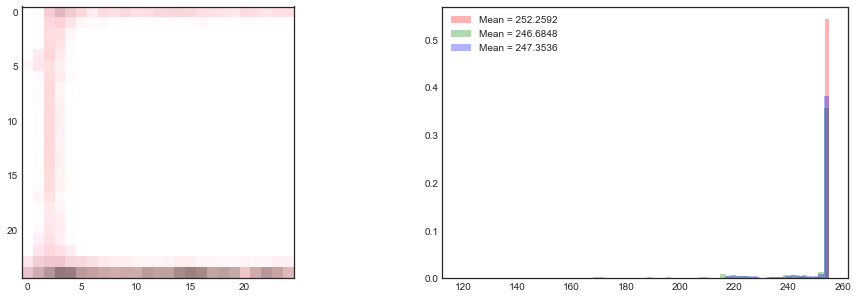

In [39]:
for pool_box in pool_boxes:
    pool = crop_wb[:, pool_box[0]: pool_box[2], :]
    red = pool[:, :, 0]
    green = pool[:, :, 1]
    blue = pool[:, :, 2]
    
    plt.subplot(1, 2, 1)
    plt.imshow(pool)
    plt.subplot(1, 2, 2)
    plt.hist(red.ravel(), bins=256 / 4, normed=True, color='r', alpha=0.3, label="Mean = {}".format(red.mean()))
    plt.hist(green.ravel(), bins=256 / 4, normed=True, color='g', alpha=0.3, label="Mean = {}".format(green.mean()))
    plt.hist(blue.ravel(), bins=256 / 4, normed=True, color='b', alpha=0.3, label="Mean = {}".format(blue.mean()))
    plt.legend()
    plt.show()